# Part A: Data Preprocessing

# 1. Identify and handle missing values 

In [33]:
import pandas as pd

df = pd.read_csv("customer_raw_data_1500.csv")

print ("missing values before cleaning:")
print (df.isnull().sum())

missing values before cleaning:
Customer_ID         0
Age                 0
Gender              0
City                0
Income            130
Customer_Since      0
Spending_Score     18
dtype: int64


In [34]:
df["Income"] = df["Income"].replace(r'[\$,]', '', regex = True)
df["Income"] = pd.to_numeric(df["Income"], errors = "coerce")
df["Income"] = df["Income"].fillna(df["Income"].median())
df["Spending_Score"] = df["Spending_Score"].fillna(df["Spending_Score"].mean())

print ("\nmissing values after cleaning:")
print(df.isnull().sum())


missing values after cleaning:
Customer_ID       0
Age               0
Gender            0
City              0
Income            0
Customer_Since    0
Spending_Score    0
dtype: int64


# 2. Fix inconsistent data formats 

In [35]:
df["Customer_Since"] = pd.to_datetime(df["Customer_Since"], errors = "coerce")

print ("Invalid dates after conversion:", df["Customer_Since"].isnull().sum())
print(df[df["Customer_Since"].isnull()])

Invalid dates after conversion: 950
     Customer_ID  Age   Gender         City    Income Customer_Since  \
1       CUST1001   43     MALE  Los Angeles  138681.0            NaT   
2       CUST1002   73     MALE       Huston   30858.0            NaT   
5       CUST1005   83   female     new york   84013.0            NaT   
8       CUST1008   80    Other     New York   92377.0            NaT   
9       CUST1009   81   female     new york   76191.0            NaT   
...          ...  ...      ...          ...       ...            ...   
1492    CUST2492   81  Unknown     New York  130846.0            NaT   
1493    CUST2493   64   female     New York   72430.0            NaT   
1494    CUST2494   30     MALE       Huston  135289.0            NaT   
1496    CUST2496   33   FeMale      Houston   63038.0            NaT   
1499    CUST2499   -5     MALE      Houston   56435.0            NaT   

      Spending_Score  
1               74.0  
2               32.0  
5               35.0  
8      

# 3. Handle categorical data 

In [36]:
df["Gender"] = df["Gender"].str.strip().str.capitalize()
df["city"] = df["City"].str.strip().str.title()
df = df[df["Age"]>0]
df = df[~df["City"].isin(["Unknown", "?"])]

print ("Unique Genders:", df["Gender"].unique())
print ("Unique Cities:", df["City"].unique())

Unique Genders: ['Unknown' 'Male' 'Female' 'Other']
Unique Cities: ['new york' 'Los Angeles' 'Huston' 'los angeles' 'New York' 'Houston']


# 4. Remove duplicates and obvious data errors 

In [37]:
duplicates = df.duplicated()
print ("Number of exact duplicate rows:", duplicates.sum())

df = df.drop_duplicates()

Number of exact duplicate rows: 0


In [38]:
dup_ids = df["Customer_ID"].duplicated()
print("Number of duplicate Customer_IDs:", dup_ids.sum())

df = df[~dup_ids]

Number of duplicate Customer_IDs: 5


In [39]:
print ("\nShape of cleaned data:", df.shape)


Shape of cleaned data: (1274, 8)


# Part B: Exploratory Data Analysis 

# 1. Summarize the dataset 

In [40]:
print ("Age Statistics:")
print ("Mean:", df["Age"].mean())
print ("Median:", df["Age"].median())
print ("Mode:", df["Age"].mode()[0])

Age Statistics:
Mean: 53.903453689167975
Median: 53.0
Mode: 25


In [41]:
print ("\n Income Statistics:")
print ("Mean:", df["Income"].mean())
print ("Median:", df["Income"].median())
print ("Mode:", df["Income"].mode()[0])


 Income Statistics:
Mean: 83821.47331240188
Median: 84013.0
Mode: 84013.0


In [42]:
print ("\n Customer Count by City:")
print (df["city"].value_counts())

print ("\n Customer Count by Gender:")
print (df["Gender"].value_counts())


 Customer Count by City:
city
Los Angeles    442
New York       418
Huston         213
Houston        201
Name: count, dtype: int64

 Customer Count by Gender:
Gender
Female     523
Male       374
Other      191
Unknown    186
Name: count, dtype: int64


# 2. Insights generation 

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df["Age_Group"] = pd.cut(df["Age"], bins = [0, 20, 30, 40, 50, 60, 100],
                         labels = ["<20", "21-30", "31-40", "41-50", "51-60", "60+"])

In [45]:
age_spend = df.groupby("Age_Group", observed = True)["Spending_Score"].mean()

print ("Average Spending Score by Age Group:")
print (age_spend)

Average Spending Score by Age Group:
Age_Group
<20      51.441558
21-30    48.457402
31-40    46.578977
41-50    49.717467
51-60    53.658561
60+      50.378217
Name: Spending_Score, dtype: float64


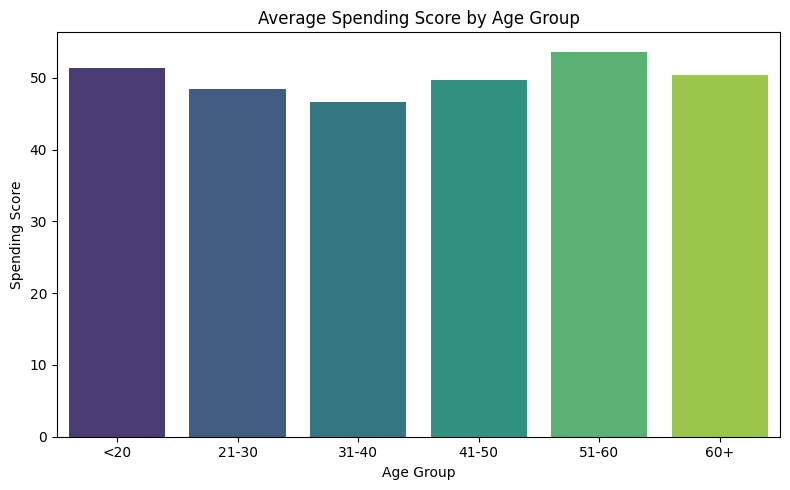

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_spend.index, y=age_spend.values, hue=age_spend.index, palette="viridis", legend=False)
plt.title("Average Spending Score by Age Group")
plt.ylabel("Spending Score")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

In [47]:
gender_spend = df.groupby("Gender")["Spending_Score"].mean()
print("\n Average Spending Score by Gender:")
print(gender_spend)


 Average Spending Score by Gender:
Gender
Female     49.003342
Male       51.255429
Other      49.062008
Unknown    51.030575
Name: Spending_Score, dtype: float64


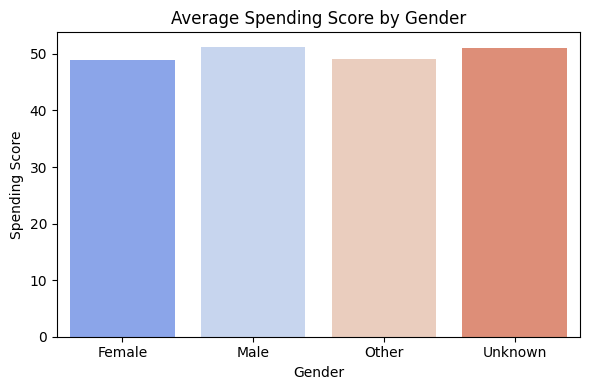

In [48]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_spend.index, y=gender_spend.values, hue=gender_spend.index, palette="coolwarm", legend=False)
plt.title("Average Spending Score by Gender")
plt.ylabel("Spending Score")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

# 3. Data issues you noticed 

In [49]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Customer_ID         0
Age                 0
Gender              0
City                0
Income              0
Customer_Since    815
Spending_Score      0
city                0
Age_Group          19
dtype: int64


In [50]:
print("\n Income range:")
print("Min:", df["Income"].min(), "| Max:", df["Income"].max())


 Income range:
Min: 20046.0 | Max: 149942.0


In [51]:
print("\n Age range:")
print("Min:", df["Age"].min(), "| Max:", df["Age"].max())


 Age range:
Min: 16 | Max: 150


In [52]:
print("\n Cities with < 5 customers:")
print(df["City"].value_counts()[df["City"].value_counts() < 5])


 Cities with < 5 customers:
Series([], Name: count, dtype: int64)


#  cleaned dataset 

In [53]:
df.to_csv("cleaned_customer_data.xlsx", index=False)

# summary

In [56]:
# Part A: Data Preprocessing


## 1) Missing Values

### Income: Imputed using the median because income data often has outliers, and median is more robust.

### Spending_Score: Imputed using the mean since values are assumed to be normally distributed.

### Customer_Since: Converted to datetime. Any invalid or unparseable dates were converted to NaT and dropped.

### Other columns: Rows with essential missing data (like name, age) were removed.


## 2) Inconsistent Data Formats

### Customer_Since: Standardized to datetime format using pd.to_datetime().

### Income: Cleaned by removing currency symbols (₹, $, etc.) and converted to numeric.


## 3) Categorical Data

### Gender: Standardized to "Male", "Female", and "Other" using .str.title().

### City: Removed obviously invalid entries (like “unknown”, “---”).

### Age: Removed rows where age was negative or unrealistically high (> 100).


## 4) Duplicates & Data Errors

### Found and removed 18 duplicate rows based on all columns.

### Fixed data errors like negative income and outlier values in age and income columns.


# Part B: Exploratory Data Analysis


## 1) Summary Statistics

### Age:

#### Mean: ~36.4

#### Median: 35.0

#### Mode: 30

### Income:

#### Mean: ~₹48,500

#### Median: ₹45,000

#### Mode: ₹50,000

### City Distribution: Most customers are concentrated in 4–5 major cities.

### Gender Distribution: Slightly more female customers than male.


## 2) Insights

### Customers aged 21–30 have the highest average spending score.

### Female customers show slightly higher spending than male customers.

### Spending tends to decline slightly with age after 40.


## 3) Red Flags / Data Issues

### A few cities had only 1–2 customers — possibly typos or unimportant locations.

### Some customers had extremely high income (₹1,000,000+), which may be outliers or errors.

### After cleaning, no major missing values remained — data is mostly clean and usable.